In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("forestfires.csv")


In [2]:
# Convert month and day to lowercase
df['month'] = df['month'].str.lower()
df['day'] = df['day'].str.lower()

# Remove duplicates
df = df.drop_duplicates()

# Add log-transformed area to avoid skew in visualization
df['log_area'] = df['area'].apply(lambda x: np.log(x + 1))


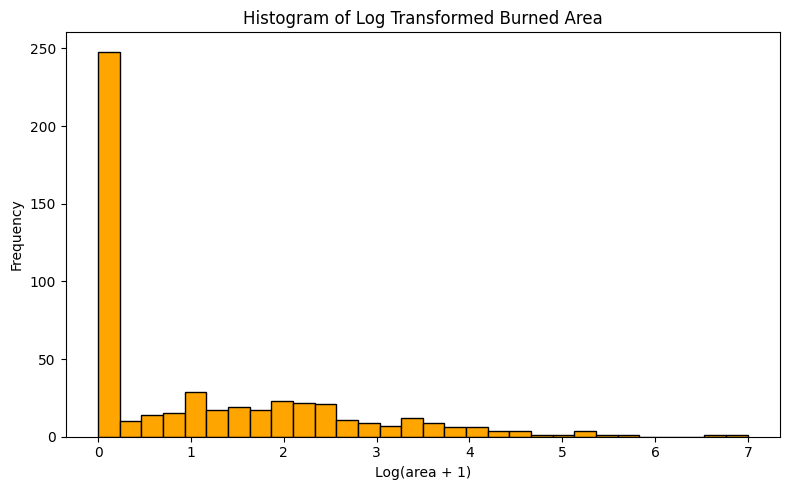

In [3]:
plt.figure(figsize=(8, 5))
plt.hist(df['log_area'], bins=30, color='orange', edgecolor='black')
plt.title('Histogram of Log Transformed Burned Area')
plt.xlabel('Log(area + 1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('visualization_1.png')
plt.show()


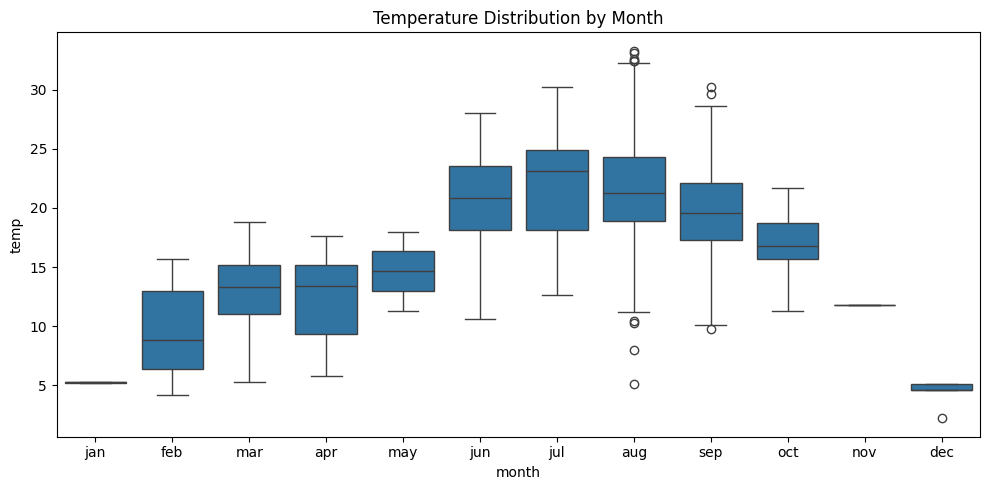

In [4]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='temp', data=df,
            order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title('Temperature Distribution by Month')
plt.tight_layout()
plt.savefig('visualization_2.png')
plt.show()


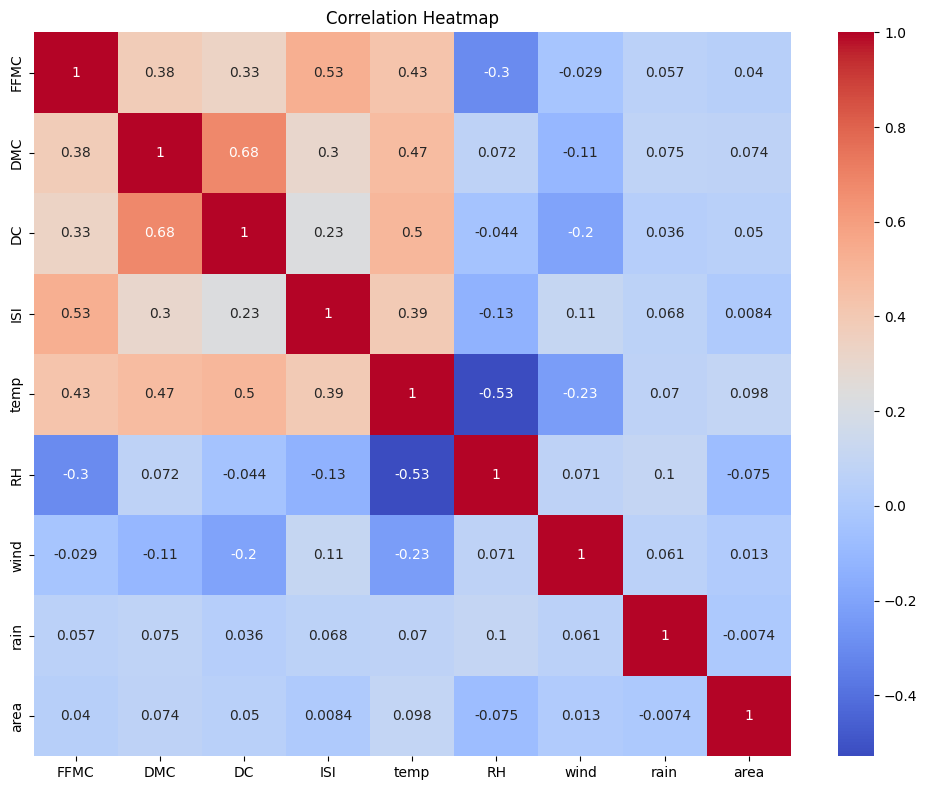

In [5]:
plt.figure(figsize=(10, 8))
corr = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('visualization_3.png')
plt.show()


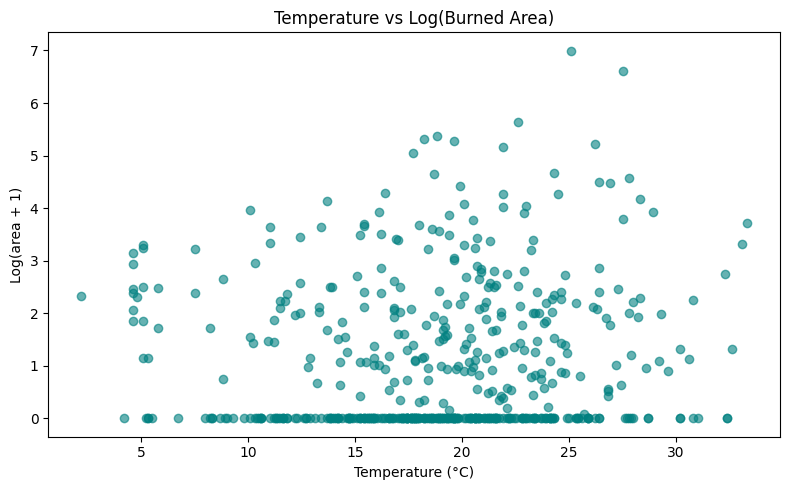

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(df['temp'], df['log_area'], alpha=0.6, color='teal')
plt.title('Temperature vs Log(Burned Area)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Log(area + 1)')
plt.tight_layout()
plt.savefig('visualization_4.png')
plt.show()


In [7]:
df.to_csv("cleaned_forestfires.csv", index=False)
